**CardioVision AI - Final Model**

Import Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.regularizers import l2

Plotting Functions

In [22]:
#plot

def plot_accuracy(model_history):
    plt.plot(model_history.history['accuracy'], label = 'Training Accuracy')
    plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
    plt.title("Accuracy of Model")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_loss(model_history):
    plt.plot(model_history.history['loss'], label = 'Training Loss')
    plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
    plt.title("Loss of Model")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.grid(True)
    plt.legend()
    plt.show()

Import Data and Preprocess

In [23]:
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [24]:
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True, drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest pain type      918 non-null    int64  
 3   resting bp s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting blood sugar  918 non-null    int64  
 6   resting ecg          918 non-null    int64  
 7   max heart rate       918 non-null    int64  
 8   exercise angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [25]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

print(f"First 5 Lines of Input Data: {X[0:6]}")
print(f"\nFirst 5 Lines of Target Data: {y[0:6]}")

First 5 Lines of Input Data: [[ 40.    1.    2.  140.  289.    0.    0.  172.    0.    0.    1. ]
 [ 49.    0.    3.  160.  180.    0.    0.  156.    0.    1.    2. ]
 [ 37.    1.    2.  130.  283.    0.    1.   98.    0.    0.    1. ]
 [ 48.    0.    4.  138.  214.    0.    0.  108.    1.    1.5   2. ]
 [ 54.    1.    3.  150.  195.    0.    0.  122.    0.    0.    1. ]
 [ 39.    1.    3.  120.  339.    0.    0.  170.    0.    0.    1. ]]

First 5 Lines of Target Data: [0 1 0 1 0 0]


Split Training, Validation and Test Data

In [26]:
#Split Data

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 0)
#X_train and Y_train are now 60% of X/Y_transformed

#X_temp and Y_temp are now 40% of X/Y_transformed
#next line splits this last 40% in two parts, one for validation (20% of X/Y_transformed) and one for testing (20% of X/Y_transformed)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 0)

Final Model - Compile

In [33]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation = 'relu', name = 'L1', kernel_regularizer = l2(0.00026)),
    tf.keras.layers.Dense(15, activation = 'relu', name = 'L2', kernel_regularizer = l2(0.00026)),
    tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'OL')
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.012),
            loss = tf.keras.losses.BinaryCrossentropy(), 
            metrics = ['accuracy'])

model_2_history = model_2.fit(X_train, y_train, batch_size = 16, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
35/35 [==============================] - 0s 4ms/step - loss: 4.8003 - accuracy: 0.5909 - val_loss: 3.6568 - val_accuracy: 0.5761
Epoch 2/30
35/35 [==============================] - 0s 2ms/step - loss: 1.3977 - accuracy: 0.6327 - val_loss: 0.8397 - val_accuracy: 0.6848
Epoch 3/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.7200 - val_loss: 0.6495 - val_accuracy: 0.6630
Epoch 4/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7182 - val_loss: 0.6641 - val_accuracy: 0.7011
Epoch 5/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.7109 - val_loss: 0.8483 - val_accuracy: 0.6902
Epoch 6/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.7345 - val_loss: 0.6074 - val_accuracy: 0.7120
Epoch 7/30
35/35 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.7236 - val_loss: 0.6139 - val_accuracy: 0.7880
Epoch 8/30
35/35 [==

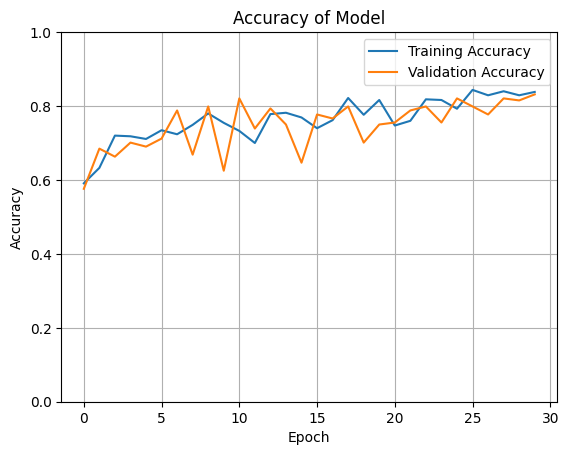

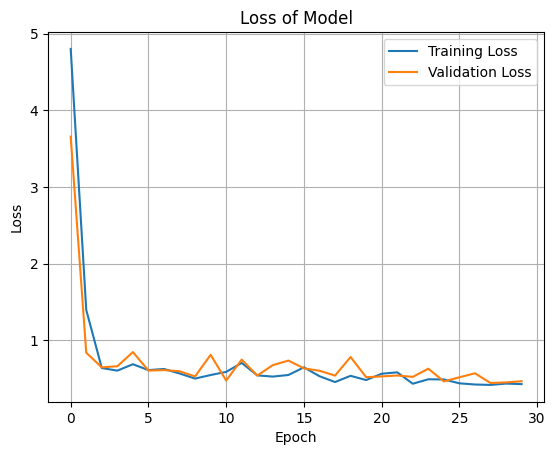

In [34]:
plot_accuracy(model_2_history)
plot_loss(model_2_history)

Evaluate Model on Test Data

MODEL PREDICTION ON TEST DATA SET
6/6 [==============================] - 0s 801us/step - loss: 0.5070 - accuracy: 0.8370
[0.5070194602012634, 0.8369565010070801]
6/6 [==============================] - 0s 801us/step

Confusion Matrix
[[61 20]
 [10 93]]


Text(50.722222222222214, 0.5, 'Truth')

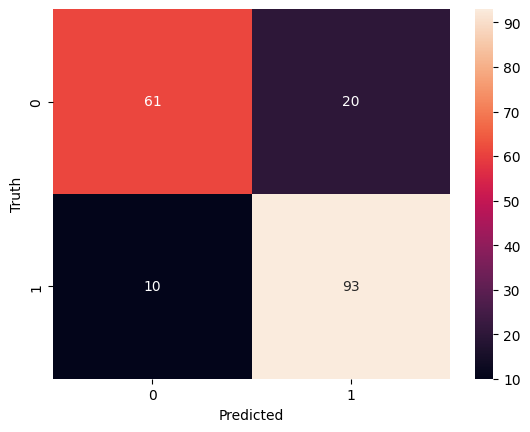

In [35]:
print('MODEL PREDICTION ON TEST DATA SET')
results= model_2.evaluate(X_test, y_test)
print(results)

y_predicted_m2 = model_2.predict(X_test)
y_predicted_m2 = y_predicted_m2.flatten()
y_predicted_m2 = np.where(y_predicted_m2 > 0.5, 1, 0)

print('\nConfusion Matrix')
cm = confusion_matrix(y_test, y_predicted_m2)
print(cm)

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')